# Cryptocurrency Market Predictor - Recurrent Neural Network

Predicting BTCUSD market

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
dataset = pd.read_csv('C:\\Users\\Jason\\Documents\\Python\\Stock Market Prediction\\Crypto\\BTC_Slopes.csv', nrows=1160)
dataset.tail(2)

,order_date_time,id,trade_px,future_px,aqsum,abqsum,bqsum,abqdt,aqsum3,abqdt^2,...,Spread,ratio5,ratio5dt,distRatio5,distRatio10,sign_vol,trade_volume,price_change,before price_change,god_mode
1158,2018-03-03 05:44:07,1883747.0,11281.505,11270.005,54.986024,35.244324,19.741700,2.377053,33.261309,2.377053,...,0.01,0.855152,-0.004364,2.55,2.55,-0.185305,0.0165,-11.50,1,57774.251339
1159,2018-03-03 05:49:39,1885362.0,11302.435,11315.175,7.139539,-49.613827,56.753366,-2.515611,0.443642,-2.584361,...,0.01,0.054515,0.006113,0.87,0.87,-0.038927,0.0815,12.74,1,57774.251339


In [3]:
dataset_1sec = pd.read_csv('C:\\Users\\Jason\\Documents\\Python\\Stock Market Prediction\\Crypto\\BTC_Slopes_1sec.csv', nrows=600000)
dataset_1sec=dataset_1sec[-257000:]
dataset_1sec.head(2)

,order_date_time,Spread,trade_px,a1,b1,aq1,bq1,aqsum5,bqsum5,aqsum3,...,abqdt,abqdt^2,rollingRatio,ratio3,ratio5,ratio5dt,sign_vol,abqsum,diff,norepeat
343000,2018-03-03 06:25:51,0.01,11343.685,11343.69,11343.68,12.587137,0.479147,15.279366,1.385581,14.395432,...,-1.084282,-2.084282,0.954215,0.966326,0.916857,-0.012720,0.108060,29.617038,0.0,NaN
343001,2018-03-03 06:25:52,0.01,11343.685,11343.69,11343.68,12.587137,0.459147,15.279366,1.365581,14.395432,...,1.000000,-1.020000,0.955128,0.967625,0.917958,0.034796,0.110626,27.831554,0.0,NaN


In [4]:
dataset_1sec.tail(2)

,order_date_time,Spread,trade_px,a1,b1,aq1,bq1,aqsum5,bqsum5,aqsum3,...,abqdt,abqdt^2,rollingRatio,ratio3,ratio5,ratio5dt,sign_vol,abqsum,diff,norepeat
599998,2018-03-06 05:49:09,0.67,11307.535,11307.87,11307.20,0.022433,0.324,9.808412,3.035,9.797412,...,1.147000,1.162892,0.037286,0.764145,0.763692,0.088999,-0.008525,-17.342623,0.020,0.020
599999,2018-03-06 05:49:10,0.64,11307.550,11307.87,11307.23,0.024433,2.620,9.810412,2.645,9.799412,...,-0.015892,2.309892,0.037098,0.788151,0.787643,0.061492,0.017109,-18.891823,0.015,0.015


In [5]:
dataset_px = dataset.filter(['order_date_time','trade_px'], axis=1)
dataset_px.head(2)

,order_date_time,trade_px
0,2018-02-27 07:10:00,10301.005
1,2018-02-27 07:17:50,10343.395


In [6]:
#pd.to_datetime(odt.index).to_frame()
dataset_1sec_px = dataset_1sec.filter(['order_date_time','trade_px'], axis=1)
dataset_1sec_px.head(2)

,order_date_time,trade_px
343000,2018-03-03 06:25:51,11343.685
343001,2018-03-03 06:25:52,11343.685


#### Normalize

In [7]:

tdt=dataset.iloc[:, 0:2]
dataset = dataset.drop('order_date_time', 1)
dataset=dataset[['price_change','Spread','abq5','abratio','ratio5','abqdt','ratio3','distRatio5','distRatio10']]
dataset.head(2)

,price_change,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10
0,10.27,0.01,-1.681736,0.863120,0.464218,1.631992,0.463683,-0.50,-0.50
1,-15.50,0.01,-3.673683,0.360834,0.186679,1.112197,0.175497,-0.99,-0.99


In [8]:
dataset_1sec = dataset_1sec.drop('order_date_time', 1)
dataset_1sec=dataset_1sec[['diff','Spread','abq5','abratio','ratio5','abqdt','ratio3','distRatio5','distRatio10']]
dataset_1sec.head(2)

,diff,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10
343000,0.0,0.01,13.893785,0.963329,0.916857,-1.084282,0.966326,4.78,4.78
343001,0.0,0.01,13.913785,0.964806,0.917958,1.000000,0.967625,4.78,4.78


In [9]:
price_changeRange=dataset["price_change"].max() - dataset["price_change"].min()
price_changeMean = dataset["price_change"].mean()
datasetNorm = (dataset - dataset.mean()) / (dataset.max() - dataset.min())
datasetNorm["before price_change"]=0
datasetNorm.head(3)

,price_change,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10,before price_change
0,0.129294,-0.007354,-0.014313,0.366500,-0.008264,0.020430,-0.037533,-0.006725,-0.006725,0
1,-0.174968,-0.007354,-0.024762,-0.135787,-0.286043,0.015852,-0.325805,-0.017597,-0.017597,0
2,0.298014,-0.007354,-0.104812,-0.496614,-0.385205,-0.024101,-0.414123,-0.024919,-0.024919,0


In [10]:
diffRange=dataset_1sec["diff"].max() - dataset_1sec["diff"].min()
diffMean = dataset_1sec["diff"].mean()
dataset_1secNorm = (dataset_1sec - dataset_1sec.mean()) / (dataset_1sec.max() - dataset_1sec.min())
dataset_1secNorm["before diff"]=0
dataset_1secNorm.head(3)

,diff,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10,before diff
343000,0.000002,-0.001231,0.053718,0.469942,0.429200,-0.011544,0.469963,0.088317,0.088317,0
343001,0.000002,-0.001231,0.053797,0.471419,0.430303,0.010645,0.471262,0.088317,0.088317,0
343002,0.000002,-0.001231,0.045845,0.383379,0.359566,0.021504,0.390865,0.080651,0.080651,0


In [11]:
diffRange

59.880000000000003

## Hyperparams

In [12]:
num_epochs = 20

batch_size = 1

total_series_length = len(dataset.index)

truncated_backprop_length = 1 #The size of the sequence

state_size = 10#The number of neurons

num_features = 8
num_classes = 1 #[1,0]

num_batches = total_series_length//batch_size//truncated_backprop_length

min_test_size = 200

print('The total series length is: %d' %total_series_length)
print('The current configuration gives us %d batches of %d observations each one looking %d steps in the past' 
      %(num_batches,batch_size,truncated_backprop_length))

The total series length is: 1160
The current configuration gives us 1160 batches of 1 observations each one looking 1 steps in the past


## Train-Test split

In [13]:
datasetTrain = datasetNorm[dataset.index < num_batches*batch_size*truncated_backprop_length]


for i in range(min_test_size,len(datasetNorm.index)):
    
    if(i % truncated_backprop_length*batch_size == 0):
        test_first_idx = len(datasetNorm.index)-i
        break

datasetTest =  dataset_1secNorm

In [14]:
datasetTrain.head(2)

,price_change,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10,before price_change
0,0.129294,-0.007354,-0.014313,0.366500,-0.008264,0.020430,-0.037533,-0.006725,-0.006725,0
1,-0.174968,-0.007354,-0.024762,-0.135787,-0.286043,0.015852,-0.325805,-0.017597,-0.017597,0


In [15]:
datasetTest.head(2)

,diff,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10,before diff
343000,0.000002,-0.001231,0.053718,0.469942,0.429200,-0.011544,0.469963,0.088317,0.088317,0
343001,0.000002,-0.001231,0.053797,0.471419,0.430303,0.010645,0.471262,0.088317,0.088317,0


In [16]:
#Pick appropriate columns to train
xTrain = datasetTrain[['Spread','abq5','abratio','ratio5','abqdt','ratio3','distRatio5','distRatio10']].as_matrix()
yTrain = datasetTrain['price_change'].as_matrix()
#, 'vol10','ratio10','ratio30', 'vol30'

In [17]:
print(xTrain[0:2],'\n',yTrain[0:2])

[[-0.00735427 -0.01431341  0.36650023 -0.00826422  0.02043045 -0.03753255
  -0.0067251  -0.0067251 ]
 [-0.00735427 -0.02476185 -0.13578661 -0.28604265  0.01585207 -0.32580549
  -0.01759708 -0.01759708]] 
 [ 0.12929443 -0.17496784]


In [18]:
#Pick appropriate columns to test
xTest = datasetTest[['Spread','abq5','abratio','ratio5','abqdt','ratio3','distRatio5','distRatio10']].as_matrix()
yTest = datasetTest['diff'].as_matrix()
#,'vol10','ratio10','ratio30', 'vol30'

In [19]:
print(xTest[0:2],'\n',yTest[0:2])

[[-0.00123131  0.05371815  0.46994191  0.42920034 -0.01154364  0.46996274
   0.08831671  0.08831671]
 [-0.00123131  0.05379688  0.47141869  0.43030267  0.01064536  0.47126202
   0.08831671  0.08831671]] 
 [  2.34788708e-06   2.34788708e-06]


## Visualize starting price data

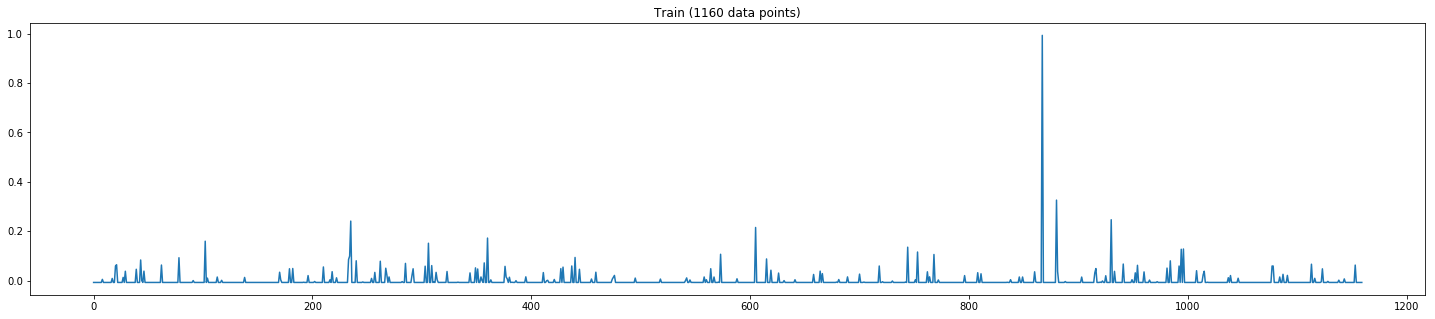

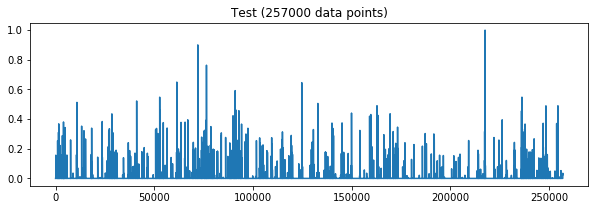

In [20]:
plt.figure(figsize=(25,5))
plt.plot(xTrain[:,0])
plt.title('Train (' +str(len(xTrain))+' data points)')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(xTest[:,0])
plt.title('Test (' +str(len(xTest))+' data points)')
plt.show()

## Placeholders

In [21]:
batchX_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_features],name='data_ph')
batchY_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_classes],name='target_ph')

## Weights and biases
Because is a 3 layer net:
1. Input
2. Hidden Recurrent layer
3. Output

We need 2 pairs of W and b

In [22]:
W2 = tf.Variable(initial_value=np.random.rand(state_size,num_classes),dtype=tf.float32)
b2 = tf.Variable(initial_value=np.random.rand(1,num_classes),dtype=tf.float32)

Unpack

In [23]:
labels_series = tf.unstack(batchY_placeholder, axis=1)

## Forward pass - Unroll the cell

Input to recurrent

In [24]:
cell = tf.contrib.rnn.BasicRNNCell(num_units=state_size)

states_series, current_state = tf.nn.dynamic_rnn(cell=cell,inputs=batchX_placeholder,dtype=tf.float32)

In [25]:
states_series = tf.transpose(states_series,[1,0,2])

## Backward pass - Output

In [26]:
last_state = tf.gather(params=states_series,indices=states_series.get_shape()[0]-1)
last_label = tf.gather(params=labels_series,indices=len(labels_series)-1)

## Weights and bias out

In [27]:
weight = tf.Variable(tf.truncated_normal([state_size,num_classes]))
bias = tf.Variable(tf.constant(0.1,shape=[num_classes]))

## Prediction, Loss & Optimizer

In [28]:
prediction = tf.matmul(last_state,weight) + bias
prediction

<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

In [29]:
loss = tf.reduce_mean(tf.squared_difference(last_label,prediction))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

C:\Users\Jason\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [30]:
loss_list = []
test_pred_list = []

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    for epoch_idx in range(num_epochs):
                
        print('Epoch %d' %epoch_idx)
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length * batch_size
        
            
            batchX = xTrain[start_idx:end_idx,:].reshape(batch_size,truncated_backprop_length,num_features)
            batchY = yTrain[start_idx:end_idx].reshape(batch_size,truncated_backprop_length,1)
                
            #print('IDXs',start_idx,end_idx)
            #print('X',batchX.shape,batchX)
            #print('Y',batchX.shape,batchY)
            
            feed = {batchX_placeholder : batchX, batchY_placeholder : batchY}
            
            #TRAIN!
            _loss,_train_step,_pred,_last_label,_prediction = sess.run(
                fetches=[loss,train_step,prediction,last_label,prediction],
                feed_dict = feed
            )
            
            loss_list.append(_loss)
            
           
            
            if(batch_idx % 200 == 0):
                print('Step %d - Loss: %.6f' %(batch_idx,_loss))
                
    #TEST
    
    
    for test_idx in range(len(xTest) - truncated_backprop_length):
        
        testBatchX = xTest[test_idx:test_idx+truncated_backprop_length,:].reshape((1,truncated_backprop_length,num_features))        
        testBatchY = yTest[test_idx:test_idx+truncated_backprop_length].reshape((1,truncated_backprop_length,1))

        
        #_current_state = np.zeros((batch_size,state_size))
        feed = {batchX_placeholder : testBatchX,
            batchY_placeholder : testBatchY}

        #Test_pred contains 'window_size' predictions, we want the last one
        _last_state,_last_label,test_pred = sess.run([last_state,last_label,prediction],feed_dict=feed)
        test_pred_list.append(test_pred[-1][0]) #The last one

Epoch 0
Step 0 - Loss: 0.022466
Step 200 - Loss: 0.014379
Step 400 - Loss: 0.000615
Step 600 - Loss: 0.039635
Step 800 - Loss: 0.003217
Step 1000 - Loss: 0.195071
Epoch 1
Step 0 - Loss: 0.028075
Step 200 - Loss: 0.000154
Step 400 - Loss: 0.000436
Step 600 - Loss: 0.037765
Step 800 - Loss: 0.002371
Step 1000 - Loss: 0.189376
Epoch 2
Step 0 - Loss: 0.022810
Step 200 - Loss: 0.000086
Step 400 - Loss: 0.000624
Step 600 - Loss: 0.033769
Step 800 - Loss: 0.001644
Step 1000 - Loss: 0.187207
Epoch 3
Step 0 - Loss: 0.022333
Step 200 - Loss: 0.000091
Step 400 - Loss: 0.000719
Step 600 - Loss: 0.032673
Step 800 - Loss: 0.001464
Step 1000 - Loss: 0.186665
Epoch 4
Step 0 - Loss: 0.022182
Step 200 - Loss: 0.000097
Step 400 - Loss: 0.000749
Step 600 - Loss: 0.032624
Step 800 - Loss: 0.001447
Step 1000 - Loss: 0.187137
Epoch 5
Step 0 - Loss: 0.022104
Step 200 - Loss: 0.000099
Step 400 - Loss: 0.000750
Step 600 - Loss: 0.032867
Step 800 - Loss: 0.001473
Step 1000 - Loss: 0.188059
Epoch 6
Step 0 - Loss:

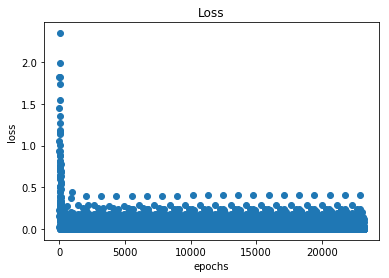

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Loss')
plt.scatter(x=np.arange(0,len(loss_list)),y=loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show();

#### Denormalize

In [32]:
Price = pd.DataFrame(xTest)
Price.head(10)

,0,1,2,3,4,5,6,7
0,-0.001231,0.053718,0.469942,0.429200,-0.011544,0.469963,0.088317,0.088317
1,-0.001231,0.053797,0.471419,0.430303,0.010645,0.471262,0.088317,0.088317
2,-0.001231,0.045845,0.383379,0.359566,0.021504,0.390865,0.080651,0.080651
3,-0.001231,0.037894,0.295340,0.292687,0.010752,0.315342,0.072985,0.072985
4,-0.001231,0.037739,0.295340,0.292194,-0.026238,0.314872,0.072985,0.072985
5,-0.001231,0.057141,0.460632,0.424852,-0.024295,0.461367,0.088317,0.088317
6,-0.001231,0.055705,0.466237,0.427772,0.003886,0.466260,0.088317,0.088317
7,-0.001231,0.054268,0.471843,0.430888,0.008491,0.471520,0.088317,0.088317
8,-0.001231,0.048163,0.467861,0.405973,0.013097,0.446677,0.078411,0.078411
9,-0.001231,0.042057,0.463880,0.378026,0.006788,0.418405,0.068506,0.068506


In [33]:
test_pred_list[:] = [(x*diffRange)+diffMean for x in test_pred_list]
xTest[:] = [(x*diffRange)+diffMean for x in xTest]
yTest[:] = [(y*diffRange)+diffMean for y in yTest]

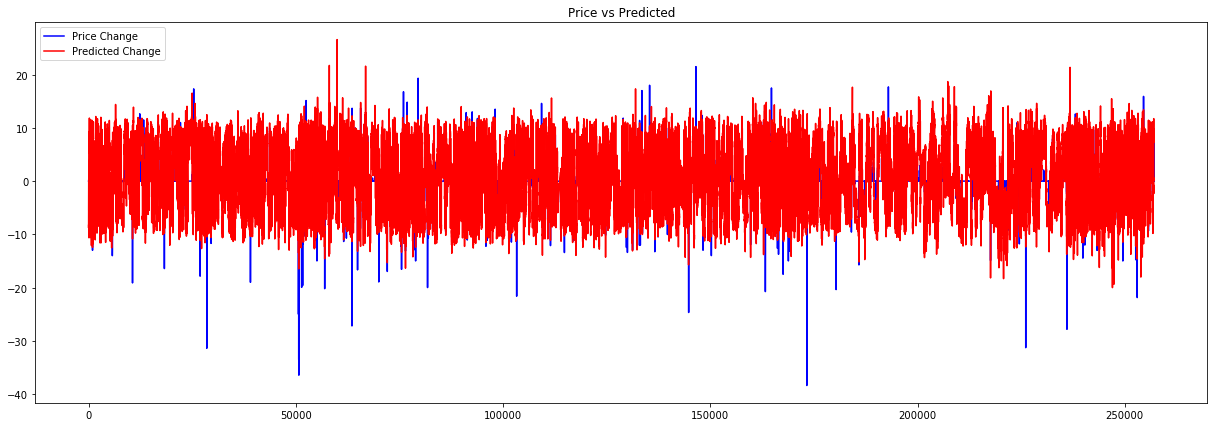

In [34]:
from scipy.ndimage.interpolation import shift
predicted=shift(test_pred_list, -5, cval=0)
plt.figure(figsize=(21,7))
plt.plot(yTest,label='Price Change',color='blue')
#plt.plot(xTest[:,0],label='Baseline')
plt.plot(test_pred_list,label='Predicted Change',color='red')
plt.title('Price vs Predicted')
plt.legend(loc='upper left')
plt.show()

In [35]:
len(test_pred_list)

256999

In [36]:
pd.DataFrame(test_pred_list, columns=['Prediction']).tail()

,Prediction
256994,0.774170
256995,0.159895
256996,0.587845
256997,-2.326670
256998,-0.837055


In [37]:
predict= pd.DataFrame(test_pred_list, columns=['Prediction'])
Target = pd.DataFrame(yTest, columns=['Target'])
Price = pd.DataFrame(xTest[:,0], columns=['Price'])
realVSpredict = predict.join(Target)
realVSpredict = realVSpredict.join(Price)
with pd.option_context('display.max_rows', None, 'display.max_columns', 4):
    print(realVSpredict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [38]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(realVSpredict['Prediction'],realVSpredict['Target'])
print("r-squared:", r_value**2)

r-squared: 0.00703264318535


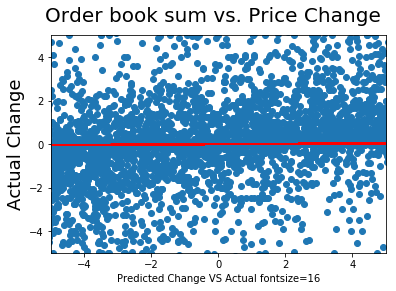

In [39]:

plt.scatter (realVSpredict['Prediction'],realVSpredict['Target'])
plt.suptitle('Order book sum vs. Price Change', fontsize=20)
plt.plot(realVSpredict['Prediction'], intercept + slope*(realVSpredict['Prediction']), 'r', label='fitted line')
plt.ylabel('Actual Change', fontsize=18)
plt.ylim( (-5, 5) )
plt.xlim(-5, 5)
plt.xlabel('Predicted Change VS Actual fontsize=16')
plt.show()

In [40]:
PriceChange = pd.DataFrame(xTest[:,0])
PriceChange.head(10)

,0
0,-0.073871
1,-0.073871
2,-0.073871
3,-0.073871
4,-0.073871
5,-0.073871
6,-0.073871
7,-0.073871
8,-0.073871
9,-0.073871


In [41]:
tdt[-3:]

,order_date_time,id
1157,2018-03-03 05:34:00,1.881436e+06
1158,2018-03-03 05:44:07,1.883747e+06
1159,2018-03-03 05:49:39,1.885362e+06


In [42]:
length=len(PriceChange.index)
length

257000

In [43]:

#pd.to_datetime(tdt,format='%Y%m%d %H:%M:%S.%f')

In [44]:
dataset_1sec_px=dataset_1sec_px[-length:]
#backtrader_data= tdt[-length:]

tdt=dataset_1sec_px['order_date_time']
Open=dataset_1sec_px['trade_px']
High= dataset_1sec_px['trade_px']
Low= dataset_1sec_px['trade_px']
Close= dataset_1sec_px['trade_px']
#Rnn10= ds.join(Price)

backtrader_data = pd.concat([tdt,Open, High, Low, Close], axis=1)
#date_time=pd.to_datetime(backtrader_data.trades_date_time, format="%Y%m%d %H:%M:%S.%f").to_frame()
#backtrader_data = backtrader_data.drop(backtrader_data.index[range(0,5)])
backtrader_data.tail(20)


,order_date_time,trade_px,trade_px,trade_px,trade_px
599980,2018-03-06 05:48:51,11297.9950,11297.9950,11297.9950,11297.9950
599981,2018-03-06 05:48:52,11297.9950,11297.9950,11297.9950,11297.9950
599982,2018-03-06 05:48:53,11297.9950,11297.9950,11297.9950,11297.9950
599983,2018-03-06 05:48:54,11297.9950,11297.9950,11297.9950,11297.9950
599984,2018-03-06 05:48:55,11297.9950,11297.9950,11297.9950,11297.9950
599985,2018-03-06 05:48:56,11297.9950,11297.9950,11297.9950,11297.9950
599986,2018-03-06 05:48:57,11297.9950,11297.9950,11297.9950,11297.9950
599987,2018-03-06 05:48:58,11297.9950,11297.9950,11297.9950,11297.9950
599988,2018-03-06 05:48:59,11297.9950,11297.9950,11297.9950,11297.9950
599989,2018-03-06 05:49:00,11297.9950,11297.9950,11297.9950,11297.9950


In [45]:
backtrader_data = backtrader_data.reset_index(drop=True)
backtrader_data=backtrader_data.join(predict)
#backtrader_data['RNN']=backtrader_data['Prediction']+backtrader_data.iloc[:, [1]]
backtrader_data.head(2)

,order_date_time,trade_px,trade_px,trade_px,trade_px,Prediction
0,2018-03-03 06:25:51,11343.685,11343.685,11343.685,11343.685,-8.302526
1,2018-03-03 06:25:52,11343.685,11343.685,11343.685,11343.685,-8.781155


In [46]:
backtrader_data = backtrader_data[:-1]
backtrader_data.tail()

,order_date_time,trade_px,trade_px,trade_px,trade_px,Prediction
256994,2018-03-06 05:49:05,11307.4400,11307.4400,11307.4400,11307.4400,0.774170
256995,2018-03-06 05:49:06,11307.4675,11307.4675,11307.4675,11307.4675,0.159895
256996,2018-03-06 05:49:07,11307.4950,11307.4950,11307.4950,11307.4950,0.587845
256997,2018-03-06 05:49:08,11307.5150,11307.5150,11307.5150,11307.5150,-2.326670
256998,2018-03-06 05:49:09,11307.5350,11307.5350,11307.5350,11307.5350,-0.837055


In [47]:
backtrader_data['RNN']=backtrader_data['Prediction']+backtrader_data.iloc[:, 1]

In [48]:

backtrader_data = backtrader_data.set_index(pd.DatetimeIndex(backtrader_data['order_date_time']))
backtrader_data= backtrader_data.drop('order_date_time', axis=1)
backtrader_data= backtrader_data.drop('Prediction', axis=1)

# Resampling

In [49]:


#backtrader_data = backtrader_data.resample('s').mean()

#backtrader_data[['Prediction']]=backtrader_data[['Prediction']].fillna(value=0)
#backtrader_data=backtrader_data.fillna(method='bfill')
backtrader_data.head(30)

,trade_px,trade_px,trade_px,trade_px,RNN
order_date_time,,,,,
2018-03-03 06:25:51,11343.685,11343.685,11343.685,11343.685,11335.382474
2018-03-03 06:25:52,11343.685,11343.685,11343.685,11343.685,11334.903845
2018-03-03 06:25:53,11343.685,11343.685,11343.685,11343.685,11336.281676
2018-03-03 06:25:54,11343.685,11343.685,11343.685,11343.685,11338.003188
2018-03-03 06:25:55,11343.685,11343.685,11343.685,11343.685,11338.821142
2018-03-03 06:25:56,11343.685,11343.685,11343.685,11343.685,11335.749896
2018-03-03 06:25:57,11343.685,11343.685,11343.685,11343.685,11335.102285
2018-03-03 06:25:58,11343.685,11343.685,11343.685,11343.685,11334.935116
2018-03-03 06:25:59,11343.685,11343.685,11343.685,11343.685,11335.316519


In [50]:
backtrader_data.to_csv('BTCUSD_RNN10.csv',index=True)

In [106]:
backtrader_data.index

DatetimeIndex(['2018-03-03 06:25:51', '2018-03-03 06:25:52',
               '2018-03-03 06:25:53', '2018-03-03 06:25:54',
               '2018-03-03 06:25:55', '2018-03-03 06:25:56',
               '2018-03-03 06:25:57', '2018-03-03 06:25:58',
               '2018-03-03 06:25:59', '2018-03-03 06:26:00',
               ...
               '2018-03-06 05:49:00', '2018-03-06 05:49:01',
               '2018-03-06 05:49:02', '2018-03-06 05:49:03',
               '2018-03-06 05:49:04', '2018-03-06 05:49:05',
               '2018-03-06 05:49:06', '2018-03-06 05:49:07',
               '2018-03-06 05:49:08', '2018-03-06 05:49:09'],
              dtype='datetime64[ns]', name='order_date_time', length=256999, freq=None)

In [255]:
df=backtrader_data.reset_index()
df=df.drop('order_date_time', axis=1)
df = df.iloc[:, 3:5]
df['RNN-EMA']=df['RNN'].ewm(span=50).mean()
df['RNN-EMA10']=df['RNN'].ewm(span=10).mean()
df['PX-EMA']=df['trade_px'].ewm(span=50).mean()
df['SMA']=df['trade_px'].rolling(window=3000).mean()
df['PX_Stdev']=df['trade_px'].rolling(window=3000).std()
df['PX+2stdev']=df['SMA']+(df['PX_Stdev']*1.5)
df['PX-2stdev']=df['SMA']-(df['PX_Stdev']*2)
df.tail(30)

,trade_px,RNN,RNN-EMA,RNN-EMA10,PX-EMA,SMA,PX_Stdev,PX+2stdev,PX-2stdev
256969,11297.9850,11303.352874,11304.952945,11305.304117,11295.448446,11285.852542,14.819278,11308.081459,11256.213987
256970,11297.9850,11303.508021,11304.896281,11304.977554,11295.547918,11285.862706,14.817139,11308.088414,11256.228429
256971,11297.9850,11303.655905,11304.847639,11304.737254,11295.643490,11285.872869,14.814992,11308.095358,11256.242885
256972,11297.9850,11303.670244,11304.801467,11304.543252,11295.735314,11285.883032,14.812839,11308.102291,11256.257355
256973,11297.9850,11303.360317,11304.744951,11304.328173,11295.823537,11285.893196,14.810678,11308.109213,11256.271840
256974,11297.9850,11303.383529,11304.691562,11304.156420,11295.908300,11285.903359,14.808510,11308.116124,11256.286340
256975,11297.9850,11303.394607,11304.640701,11304.017908,11295.989740,11285.913522,14.806334,11308.123024,11256.300854
256976,11297.9850,11303.405167,11304.592249,11303.906501,11296.067985,11285.923686,14.804152,11308.129913,11256.315383
256977,11297.9850,11303.498238,11304.549346,11303.832271,11296.143162,11285.933849,14.801962,11308.136791,11256.329926
256978,11297.9850,11303.391010,11304.503921,11303.752042,11296.215391,11285.944012,14.799764,11308.143659,11256.344484


In [256]:
def MACD(df,period1,period2,periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean()
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean()
    MACD = EMA1-EMA2
    
    Signal = pd.DataFrame.ewm(MACD,periodSignal).mean()
    
    Histogram = MACD-Signal
    
    return Histogram

def stochastics_oscillator(df,period):
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max()
    k = 100 * (df - l) / (h - l)
    return k

def ATR(df,period):
    '''
    Method A: Current High less the current Low
    '''
    df['H-L'] = abs(df['High']-df['Low'])
    df['H-PC'] = abs(df['High']-df['Price'].shift(1))
    df['L-PC'] = abs(df['Low']-df['Price'].shift(1))
    TR = df[['H-L','H-PC','L-PC']].max(axis=1)
    return TR.to_frame()

In [257]:
#atr = ATR(df.iloc[len(df.index)-60:len(df.index)],14)

In [258]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (17,8)

In [275]:
df2 = df[21000:21500]

In [276]:
macd = MACD(df2['trade_px'],50,100,25)
macdRNN = MACD(df2['RNN'],50,100,25)

In [277]:
stochastics = stochastics_oscillator(df2['trade_px'],100)

In [ ]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Price USD', color=color)
#ax1.plot(df2['RNN'], label='RNN', color=color)
ax1.plot(df2['RNN-EMA10'], label='RNN-EMA',color='blue')
ax1.plot(df2['trade_px'], label='BTC', color='black')
ax1.plot(df2['SMA'], label='SMA', color='red')
ax1.plot(df2['PX+2stdev'], label='+2stdev')
ax1.plot(df2['PX-2stdev'], label='-2stdev')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('range', color=color)  # we already handled the x-label with ax1
#ax2.plot(df2['PX+2stdev'], label='+2stdev')
#ax2.plot(df2['PX-2stdev'], label='-2stdev')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc='upper right')
plt.show()

C:\Users\Jason\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


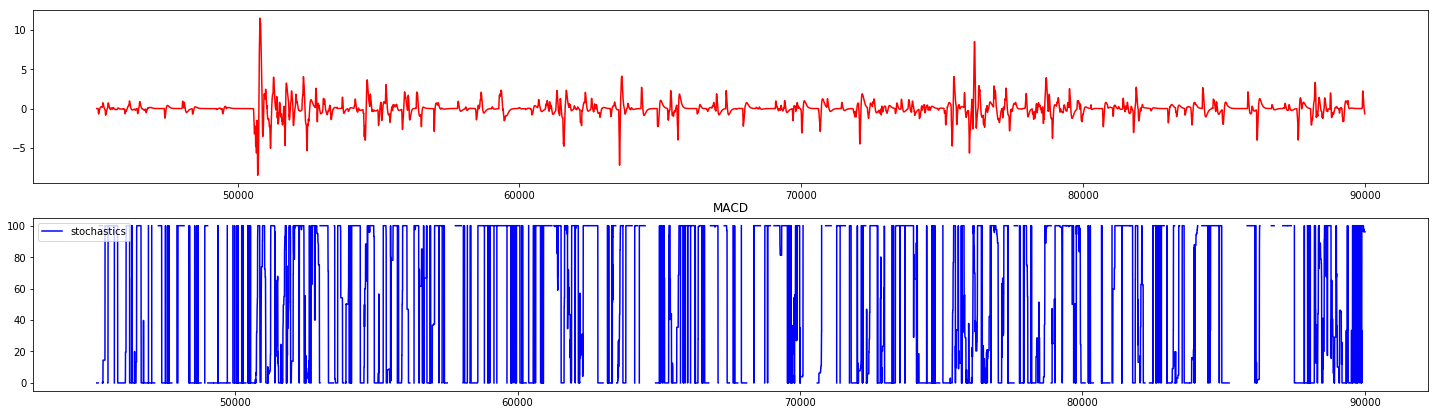

In [226]:
plt.figure(figsize=(25,7))
plt.subplot(2, 1, 1)
plt.plot(macd,label='macd',color='red')
plt.subplot(2, 1, 2)
plt.plot(stochastics,label='stochastics',color='blue')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

## 